In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import math

sns.set_style('whitegrid')

In [19]:
df_covidDeaths = pd.read_csv('data/CovidDeaths.csv')
df_covidDeaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323796 entries, 0 to 323795
Data columns (total 68 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    323796 non-null  object 
 1   continent                                   308394 non-null  object 
 2   location                                    323796 non-null  object 
 3   date                                        323796 non-null  object 
 4   population                                  323796 non-null  int64  
 5   total_cases                                 286549 non-null  float64
 6   new_cases                                   314782 non-null  float64
 7   new_cases_smoothed                          313523 non-null  float64
 8   total_deaths                                265511 non-null  float64
 9   new_deaths                                  314824 non-null  float64
 

In [20]:
df_covidDeaths.duplicated().sum()

0

In [21]:
Death_peer_cases_percentage = df_covidDeaths['total_deaths'] / df_covidDeaths['total_cases'] * 100
df_covidDeaths['Death_peer_cases_percentage'] = Death_peer_cases_percentage

In [22]:
localization = ['Brazil', 'New Zealand']

data = {}
Death_peer_cases = {}
counter = {}

a = 0

for counters in range(len(df_covidDeaths['location'])):
    if df_covidDeaths['location'][counters] in localization:
        data[a] = df_covidDeaths['date'][counters]
        Death_peer_cases[a] = df_covidDeaths['Death_peer_cases_percentage'][counters]
        counter[a] = df_covidDeaths['location'][counters]
        
        a += 1
data_plot = {}        

data_plot['counter'] = counter
data_plot['Date'] = data
data_plot['Death_peer_cases'] = Death_peer_cases

<Axes: xlabel='Date', ylabel='Death_peer_cases'>

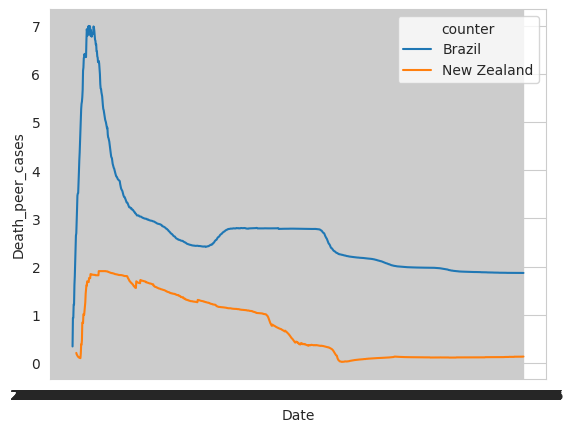

In [23]:
sns.lineplot(data=data_plot, x='Date', y='Death_peer_cases', hue='counter')
